In [1]:
#import data into d
import pandas as pd
import csv
with open('auto-mpg.data') as f:
    reader = csv.reader(f,delimiter=",")
    d = list(reader)
    
#DELETE ALL ROWS OF WHICH THE VALUE OF HORSEPOWER,WEIGHT,OR ACCELERATION IS UNKNOWN
del(d[32])
del(d[126-1])
del(d[330-2])
del(d[336-3])
del(d[354-4])
del(d[374-5])


Linear regression equation 1 (W/O Acceleration): $$y=\beta_0+\beta_1(horsepower)+\beta_2(weight)$$

Linear regression equation 2 (With Acceleration) : $$y=\beta_0+\beta_1(horsepower)+\beta_2(weight)+\beta_3(acceleration)$$

In [2]:
randomMSE1=[]
randomMSE2=[]
kMSE1=[]
kMSE2=[]
looMSE1=[]
looMSE2=[]

In [3]:
#split data 80/20 randomly, tested 10 times
lengthOfSet=[]
for i in range(0,10):
    #split data into test (20%) and traning (80%)
    from random import shuffle
    total=[]
    for x in range(0,len(d)):
        #put all indeces into total
        total.append(x)
    #shuffle all of the indices
    shuffle(total)
    train=[]
    for x in range(0,int(len(total)*0.8)):
        #put first 80% of random indeces into train
        train.append(total[x])
    test=[]
    for x in range(int(len(total)*0.8),len(total)):
        #put last 20% of random indeces into test
        test.append(total[x])
    #equation 1
    from sklearn import linear_model

    reg1 = linear_model.LinearRegression()
    trainingData1=[]
    numbers1=[]
    for x in range(0,len(train)):
        trainingData1.append([d[train[x]][3],d[train[x]][4]])
        numbers1.append(d[train[x]][0])
    reg1.fit(trainingData1,numbers1)
    first1=reg1.intercept_
    second1=reg1.coef_[0]
    third1=reg1.coef_[1]

    #equation 2
    from sklearn import linear_model

    reg2 = linear_model.LinearRegression()
    trainingData2=[]
    numbers2=[]
    for x in range(0,len(train)):
        trainingData2.append([d[train[x]][3],d[train[x]][4],d[train[x]][5]])
        numbers2.append(d[train[x]][0])
    reg2.fit(trainingData2,numbers2)
    first2=reg2.intercept_
    second2=reg2.coef_[0]
    third2=reg2.coef_[1]
    fourth2=reg2.coef_[2]


    predict1=[]
    predict2=[]
    actual=[]
    for x in range(0,len(test)):
        predict1.append((first1)+(second1*(float(d[test[x]][3])))+(third1*float((d[test[x]][4]))))
        actual.append(d[test[x]][0])
        predict2.append((first2)+(second2*(float(d[test[x]][3])))+(third2*float((d[test[x]][4]))+
                                                                   (fourth2*float(d[test[x]][5]))))
    sumOfSquares1=0.0
    sumOfSquares2=0.0
    for x in range(0,len(actual)):
        sumOfSquares1+=(float(actual[x])-float(predict1[x]))**2
        sumOfSquares2+=(float(actual[x])-float(predict2[x]))**2
    randomMSE1.append(sumOfSquares1/len(actual))
    randomMSE2.append(sumOfSquares2/len(actual))

In [4]:
#k fold 10 times
for i in range(0,10):
    total=[]
    for x in range(0,len(d)):
        #put all indeces into total
        total.append(x)
      
    #puts data before and after 10*i - 10*i+1 into train
    train=[]
    #print(i,"=====================")
    for x in range(0,int(len(total)*(i/10))):
        train.append(total[x])
    for x in range(int(len(total)*((i+1)/10)),len(total)):
        train.append(total[x])
    
    #print("train: ",0,"-",int(len(total)*(i/10))," and ",int(len(total)*((i+1)/10)),"-",len(total))
    #puts ith 10 percent into test
    test=[]
    for x in range(int(len(total)*(i/10)),int(len(total)*((i+1)/10))):
        test.append(total[x])
        
    #print("test: ",int(len(total)*(i/10)),"-",int(len(total)*((i+1)/10)))
    
    #equation 1
    from sklearn import linear_model

    reg1 = linear_model.LinearRegression()
    trainingData1=[]
    numbers1=[]
    for x in range(0,len(train)):
        trainingData1.append([d[train[x]][3],d[train[x]][4]])
        numbers1.append(d[train[x]][0])
    reg1.fit(trainingData1,numbers1)
    first1=reg1.intercept_
    second1=reg1.coef_[0]
    third1=reg1.coef_[1]

    #equation 2
    from sklearn import linear_model

    reg2 = linear_model.LinearRegression()
    trainingData2=[]
    numbers2=[]
    for x in range(0,len(train)):
        trainingData2.append([d[train[x]][3],d[train[x]][4],d[train[x]][5]])
        numbers2.append(d[train[x]][0])
    reg2.fit(trainingData2,numbers2)
    first2=reg2.intercept_
    second2=reg2.coef_[0]
    third2=reg2.coef_[1]
    fourth2=reg2.coef_[2]


    predict1=[]
    predict2=[]
    actual=[]
    for x in range(0,len(test)):
        predict1.append((first1)+(second1*(float(d[test[x]][3])))+(third1*float((d[test[x]][4]))))
        actual.append(d[test[x]][0])
        predict2.append((first2)+(second2*(float(d[test[x]][3])))+(third2*float((d[test[x]][4]))+
                                                                   (fourth2*float(d[test[x]][5]))))
    sumOfSquares1=0.0
    sumOfSquares2=0.0
    for x in range(0,len(actual)):
        sumOfSquares1+=(float(actual[x])-float(predict1[x]))**2
        sumOfSquares2+=(float(actual[x])-float(predict2[x]))**2
    kMSE1.append(sumOfSquares1/len(actual))
    kMSE2.append(sumOfSquares2/len(actual))

In [5]:
#LOOCV
for i in range(0,len(d)):
    
    total=[]
    for x in range(0,len(d)):
        #put all indeces into total
        total.append(x)

    train=[]
    for x in range(0,i):
        train.append(total[x])
    for x in range(i+1,len(total)):
        train.append(total[x])
        
        
    test=[]
    test.append(i)
    
    #print("train: ",0,i," and ",i+1,len(total))
    #print("test: ",i)
    
    
    #equation 1
    from sklearn import linear_model

    reg1 = linear_model.LinearRegression()
    trainingData1=[]
    numbers1=[]
    for x in range(0,len(train)):
        trainingData1.append([d[train[x]][3],d[train[x]][4]])
        numbers1.append(d[train[x]][0])
    reg1.fit(trainingData1,numbers1)
    first1=reg1.intercept_
    second1=reg1.coef_[0]
    third1=reg1.coef_[1]

    #equation 2
    from sklearn import linear_model

    reg2 = linear_model.LinearRegression()
    trainingData2=[]
    numbers2=[]
    for x in range(0,len(train)):
        trainingData2.append([d[train[x]][3],d[train[x]][4],d[train[x]][5]])
        numbers2.append(d[train[x]][0])
    reg2.fit(trainingData2,numbers2)
    first2=reg2.intercept_
    second2=reg2.coef_[0]
    third2=reg2.coef_[1]
    fourth2=reg2.coef_[2]


    predict1=[]
    predict2=[]
    actual=[]
    for x in range(0,len(test)):
        predict1.append((first1)+(second1*(float(d[test[x]][3])))+(third1*float((d[test[x]][4]))))
        actual.append(d[test[x]][0])
        predict2.append((first2)+(second2*(float(d[test[x]][3])))+(third2*float((d[test[x]][4]))+
                                                                   (fourth2*float(d[test[x]][5]))))
    sumOfSquares1=0.0
    sumOfSquares2=0.0
    for x in range(0,len(actual)):
        sumOfSquares1+=(float(actual[x])-float(predict1[x]))**2
        sumOfSquares2+=(float(actual[x])-float(predict2[x]))**2
        looMSE1.append(sumOfSquares1/len(actual))
        looMSE2.append(sumOfSquares2/len(actual))

1) e) 
Random subsampling is taking a random portion of the data and using that as the test and the rest as training data. K-fold CV is splitting the data into k partitions and testing the data using a single partition and using the rest as training data. LOOCV is testing the data using a single data point and training with the rest. 

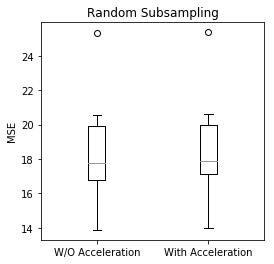

In [6]:
import matplotlib.pyplot as plt
import numpy as np
data=[randomMSE1,randomMSE2]
# Create a figure instance
fig = plt.figure(1, figsize=(4, 4))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data)
ax.set_xticklabels(['W/O Acceleration', 'With Acceleration'])
ax.set_ylabel('MSE')
ax.set_title('Random Subsampling')
plt.show()

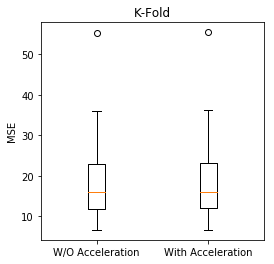

In [7]:
import matplotlib.pyplot as plt
import numpy as np
data=[kMSE1,kMSE2]
# Create a figure instance
fig = plt.figure(1, figsize=(4, 4))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data)
ax.set_xticklabels(['W/O Acceleration', 'With Acceleration'])
ax.set_ylabel('MSE')
ax.set_title('K-Fold')
plt.show()

1) h) I would choose the model without acceleration. The models are near identical in results, according to the boxplots, so factoring in the acceleration does not affect the results, so should not be included in the model.